<a href="https://colab.research.google.com/github/Ishanavi/DecisionTree/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_upload = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
import pandas as pd
import plotly.express as px

col_names = ['Pregnant', 'Glucose', 'BP', 'Skin', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Label']
features = ['Pregnant','Insulin', 'BMI', 'Pedigree', 'Age', 'Glucose', 'BP']

df = pd.read_csv("diabetes.csv",names = col_names).iloc[1:]
print(df.head())

X = df[features]
Y = df.Label

  Pregnant Glucose  BP Skin Insulin   BMI Pedigree Age Label
1        6     148  72   35       0  33.6    0.627  50     1
2        1      85  66   29       0  26.6    0.351  31     0
3        8     183  64    0       0  23.3    0.672  32     1
4        1      89  66   23      94  28.1    0.167  21     0
5        0     137  40   35     168  43.1    2.288  33     1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state =1)

clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)

print("Accuracy -->", metrics.accuracy_score(y_test,y_predict))

Accuracy --> 0.7012987012987013


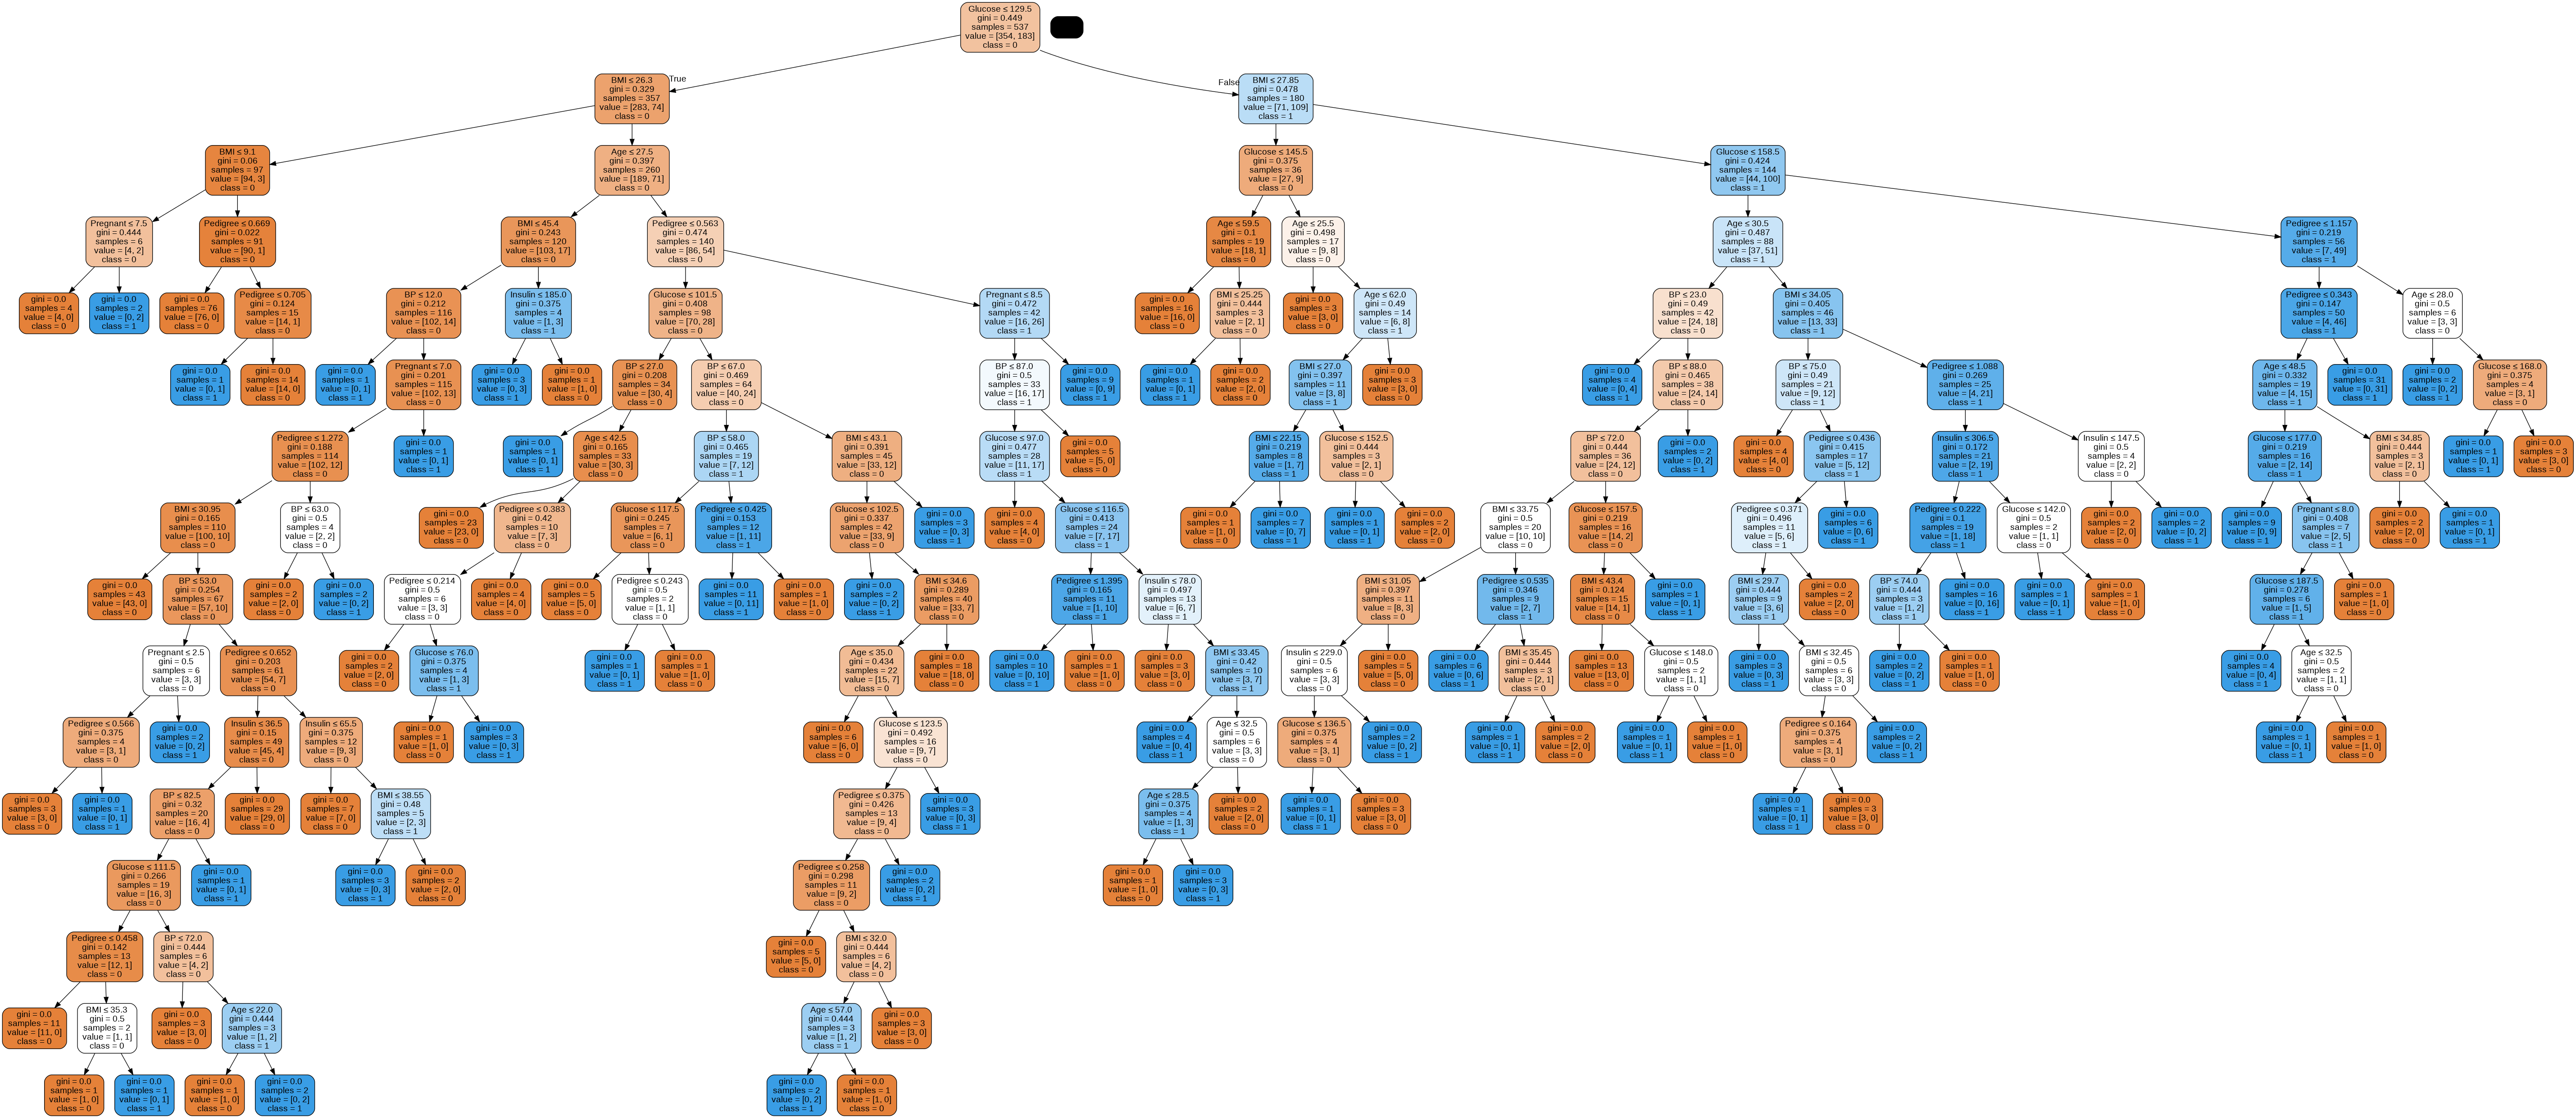

In [12]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = features,
                class_names=['0','1'])
#print(dot_data.getvalue())

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Accuracy --> 0.7575757575757576


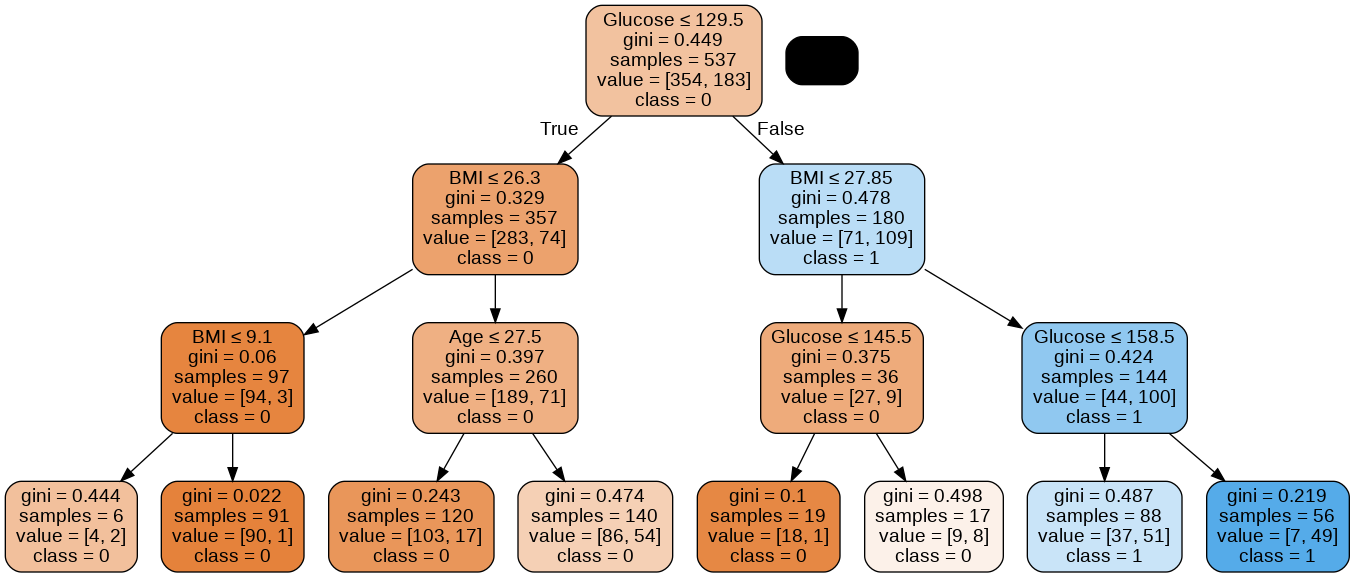

In [14]:
clf = DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)

print("Accuracy -->", metrics.accuracy_score(y_test,y_predict))

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = features,
                class_names=['0','1'])
#print(dot_data.getvalue())

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())